In [28]:
# 📌 Intelligent Task Assignment Notebook

import pandas as pd
import numpy as np
from datetime import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import joblib



In [29]:
# --------------------------------------------
# 1. Load Data & Models
# --------------------------------------------
df = pd.read_csv("../data/task_data.csv")

# Load trained models
priority_model = joblib.load("../models/priority_predictor_xgb.pkl")
priority_encoder = joblib.load("../models/priority_label_encoder.pkl")
vectorizer = joblib.load("../models/tfidf_vectorizer.pkl")



In [30]:
# --------------------------------------------
# 2. Simulated Users & Workload
# --------------------------------------------
users = ["Alice", "Bob", "Charlie", "Diana"]
user_workload = {user: random.randint(0, 5) for user in users}

print("📊 Initial User Workload:")
print(user_workload)



📊 Initial User Workload:
{'Alice': 5, 'Bob': 4, 'Charlie': 5, 'Diana': 0}


In [31]:
# --------------------------------------------
# 3. Feature Extraction for Priority Prediction
# --------------------------------------------

# Use description + category (since title is missing)
df['combined_text'] = df['description'] + " " + df['category']

# Vectorize combined text
X_features = vectorizer.transform(df['combined_text'])

# Predict and decode priority
df['predicted_priority'] = priority_encoder.inverse_transform(priority_model.predict(X_features))



In [32]:
# --------------------------------------------
# 4. Convert Deadlines to datetime
# --------------------------------------------
df['deadline'] = pd.to_datetime(df['deadline'], errors='coerce')
df = df.dropna(subset=['deadline'])



In [33]:
# --------------------------------------------
# 5. Task Assignment Logic
# --------------------------------------------
assignments = []

for _, task in df.iterrows():
    # Sort users by lowest workload
    least_loaded_users = sorted(user_workload.items(), key=lambda x: x[1])
    assigned_user = least_loaded_users[0][0]

    # Assign task and update workload
    user_workload[assigned_user] += 1
    assignments.append(assigned_user)

df['assigned_to'] = assignments




✅ Task assignment complete! Here's a preview:
                         description predicted_priority   deadline assigned_to
0      Fix login issue on mobile app             Medium 2025-07-20       Diana
1  Page crashes when submitting form             Medium 2025-07-20       Diana
2      Fix login issue on mobile app             Medium 2025-07-28       Diana
3        Create user profile section             Medium 2025-07-21       Diana
4     Client call to discuss roadmap             Medium 2025-07-19         Bob


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


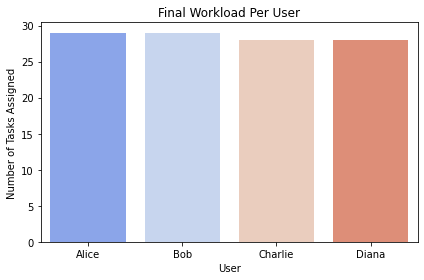

In [34]:
# --------------------------------------------
# 6. Save and Show Results
# --------------------------------------------
df.to_csv("../data/assigned_tasks.csv", index=False)

print("\n✅ Task assignment complete! Here's a preview:")
print(df[['description', 'predicted_priority', 'deadline', 'assigned_to']].head())

# Plot final workload distribution
plt.figure(figsize=(6,4))
sns.barplot(x=list(user_workload.keys()), y=list(user_workload.values()), palette="coolwarm")
plt.title("Final Workload Per User")
plt.xlabel("User")
plt.ylabel("Number of Tasks Assigned")
plt.tight_layout()
plt.show()
